# Utility: Date Filter

This notebook demonstrates the implementation of a date filter and related utilities which will be applied on the QPESUMS dataset.

The purpose of this tool is to select data with time-stamp. For QPESUMS data, the 10-min records are named as YYYYMMDDHH.npy, and we can filter the data whinin specific time interval (e.g., front event, typhoon, or by precipitation).

In [1]:
# Loading libraries
import os, csv, logging, argparse
import numpy as np
import pandas as pd

# Data dimension
nLayer = 6
nY = 275
nX = 162

# Scan QPESUMS data in *.npy: 6*275*162 
def search_dbz(srcdir):
    import pandas as pd
    fileinfo = []
    for subdir, dirs, files in os.walk(srcdir, followlinks=True):
        for f in files:
            if f.endswith('.npy'):
                # Parse file name for time information
                furi = os.path.join(subdir, f)
                finfo = f.split('.')
                ftime = finfo[0]
                #logging.debug([furi] + finfo[1:3])
                fileinfo.append([furi, ftime])
    results = pd.DataFrame(fileinfo, columns=['furi', 'timestamp'])
    results = results.sort_values(by=['timestamp']).reset_index(drop=True)
    return(results)

# Read uris containing QPESUMS data in the format of 6*275*162 
def loadDBZ(flist):
    ''' Load a list a dbz files (in npy format) into one numpy array. '''
    xdata = []
    for f in flist:
        tmp = np.load(f)
        xdata.append(tmp)
    x = np.array(xdata, dtype=np.float32)
    return(x)

## Default data scaning behavior

By default, all QPESUMS data will be stored in a folder and names with extension `npy` (numpy array object). Each record contains 6 DBZ images of 10-min interval (data dimension: 6x275x162). We will have a function `search_dbz()` to scan through the specified folder and create a dataframe with two columns: the uri to each file and the time-stamp of the file.

In the following section we need to specify some parameters such as the path to the QPESUMS data.

In [8]:
DATADIR = '../dbz_2014061316/'
# Testing
finfo = search_dbz(DATADIR)
finfo

,furi,timestamp
0,../dbz_2014061316/2014061301.npy,2014061301
1,../dbz_2014061316/2014061302.npy,2014061302
2,../dbz_2014061316/2014061303.npy,2014061303
3,../dbz_2014061316/2014061304.npy,2014061304
4,../dbz_2014061316/2014061305.npy,2014061305
5,../dbz_2014061316/2014061306.npy,2014061306
6,../dbz_2014061316/2014061307.npy,2014061307
7,../dbz_2014061316/2014061308.npy,2014061308
8,../dbz_2014061316/2014061309.npy,2014061309
9,../dbz_2014061316/2014061310.npy,2014061310


## Utility: create a list of time-stamp within specified date range

This utility is for the case we want to automatically generate a list of YYYYMMDDHH by specifying the starting and end date. For example, we knew a typhoon affect Taiwan area during certain days, and we can just give the starting date and the end date without typing each and every time-stamp by hand.

We need some extra efforts to check the HH, because in the dataset we use the coding of 01~24, but in python the system will use 00~23.

In [9]:
def correct_qpe_timestamp(ts):
    '''Check the time-stamp string in the form of YYYY-mm-dd-HH:
         - if HH = 24, increment the dd by one and change HH to 00
    '''
    import datetime
    if ts[8:] == '24':
        oldt = datetime.datetime.strptime(ts[:8], '%Y%m%d')
        newt = oldt + datetime.timedelta(days=1)
        newt_str = newt.strftime('%Y%m%d')+'00'
        return(newt_str)
    else:
        return(ts)
    
def convert_to_qpe_timestamp(ts):
    '''Check the time-stamp string in the form of YYYY-mm-dd-HH:
         - if HH = 00, decrease the dd by one and change HH to 24
    '''
    import datetime
    if ts[8:] == '00':
        oldt = datetime.datetime.strptime(ts[:8], '%Y%m%d')
        newt = oldt - datetime.timedelta(days=1)
        newt_str = newt.strftime('%Y%m%d')+'24'
        return(newt_str)
    else:
        return(ts)

In [10]:
# Test time-stamp correction
d1 = '2014061301'
print(correct_qpe_timestamp(d1))
print(convert_to_qpe_timestamp(correct_qpe_timestamp(d1)))

d1 = '2014061624'
print(correct_qpe_timestamp(d1))
print(convert_to_qpe_timestamp(correct_qpe_timestamp(d1)))

2014061301
2014061301
2014061700
2014061624


In [11]:
def create_timestamps(start_date, end_date, nhr=1):
    '''Creating a list of YYYYMMDDHH with 1hour interval during the start_date and end_date.'''
    import datetime
    # Convert YYYYMMDD strings to datetime object
    starttime = datetime.datetime.strptime(start_date, '%Y%m%d%H')
    endtime = datetime.datetime.strptime(end_date, '%Y%m%d%H')
    timestep = datetime.timedelta(hours=nhr)
    # Create YYYYMMDDHH list 
    tslist = []
    while starttime <= endtime:
        tslist.append(convert_to_qpe_timestamp(starttime.strftime('%Y%m%d%H')))
        starttime += timestep
    # Done
    return(tslist)

In [12]:
# Test
create_timestamps('2019010100','2019010216')

['2018123124',
 '2019010101',
 '2019010102',
 '2019010103',
 '2019010104',
 '2019010105',
 '2019010106',
 '2019010107',
 '2019010108',
 '2019010109',
 '2019010110',
 '2019010111',
 '2019010112',
 '2019010113',
 '2019010114',
 '2019010115',
 '2019010116',
 '2019010117',
 '2019010118',
 '2019010119',
 '2019010120',
 '2019010121',
 '2019010122',
 '2019010123',
 '2019010124',
 '2019010201',
 '2019010202',
 '2019010203',
 '2019010204',
 '2019010205',
 '2019010206',
 '2019010207',
 '2019010208',
 '2019010209',
 '2019010210',
 '2019010211',
 '2019010212',
 '2019010213',
 '2019010214',
 '2019010215',
 '2019010216']

In [13]:
# Create a range of dates in Python
# https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
import datetime

ts0 = finfo['timestamp'][0]
ts1 = finfo['timestamp'][finfo.shape[0]-1]
print(ts0)
print(ts1)

starttime = correct_qpe_timestamp(ts0)
endtime = correct_qpe_timestamp(ts1)
timestep = datetime.timedelta(hours=1)
print(starttime)
print(endtime)

tslist = create_timestamps(starttime, endtime)
    
print(tslist)

2014061301
2014061624
2014061301
2014061700
['2014061301', '2014061302', '2014061303', '2014061304', '2014061305', '2014061306', '2014061307', '2014061308', '2014061309', '2014061310', '2014061311', '2014061312', '2014061313', '2014061314', '2014061315', '2014061316', '2014061317', '2014061318', '2014061319', '2014061320', '2014061321', '2014061322', '2014061323', '2014061324', '2014061401', '2014061402', '2014061403', '2014061404', '2014061405', '2014061406', '2014061407', '2014061408', '2014061409', '2014061410', '2014061411', '2014061412', '2014061413', '2014061414', '2014061415', '2014061416', '2014061417', '2014061418', '2014061419', '2014061420', '2014061421', '2014061422', '2014061423', '2014061424', '2014061501', '2014061502', '2014061503', '2014061504', '2014061505', '2014061506', '2014061507', '2014061508', '2014061509', '2014061510', '2014061511', '2014061512', '2014061513', '2014061514', '2014061515', '2014061516', '2014061517', '2014061518', '2014061519', '2014061520', '20

In [14]:
# Scan for qpesums data and then filter with time-stamps
tslist = create_timestamps('2014061308', '2014061320')
print(tslist)
# Filter
fselected = finfo['timestamp'].isin(tslist)
#print(fselected)
print(finfo.loc[fselected,:])

['2014061308', '2014061309', '2014061310', '2014061311', '2014061312', '2014061313', '2014061314', '2014061315', '2014061316', '2014061317', '2014061318', '2014061319', '2014061320']
                                furi   timestamp
7   ../dbz_2014061316/2014061308.npy  2014061308
8   ../dbz_2014061316/2014061309.npy  2014061309
9   ../dbz_2014061316/2014061310.npy  2014061310
10  ../dbz_2014061316/2014061311.npy  2014061311
11  ../dbz_2014061316/2014061312.npy  2014061312
12  ../dbz_2014061316/2014061313.npy  2014061313
13  ../dbz_2014061316/2014061314.npy  2014061314
14  ../dbz_2014061316/2014061315.npy  2014061315
15  ../dbz_2014061316/2014061316.npy  2014061316
16  ../dbz_2014061316/2014061317.npy  2014061317
17  ../dbz_2014061316/2014061318.npy  2014061318
18  ../dbz_2014061316/2014061319.npy  2014061319
19  ../dbz_2014061316/2014061320.npy  2014061320


## Creating List

Here we use the tolls above to create a few lists of dates:

- by Precipitation threshold

  -  1 mm/hr
  -  5 mm/hr
  - 10 mm/hr
  - 20 mm/hr
  - 40 mm/hr

- by Typhoon events

We need to use the precipitation data (`data/t1hr.csv`) and the typhoon records (`data/2013-2016_TYW.xlsx`) to perform this task.

### List by Precipitation Amount

We first read in the precipitation of each station, and then use the maximal precipitation at each time stamp.

(35064, 45)


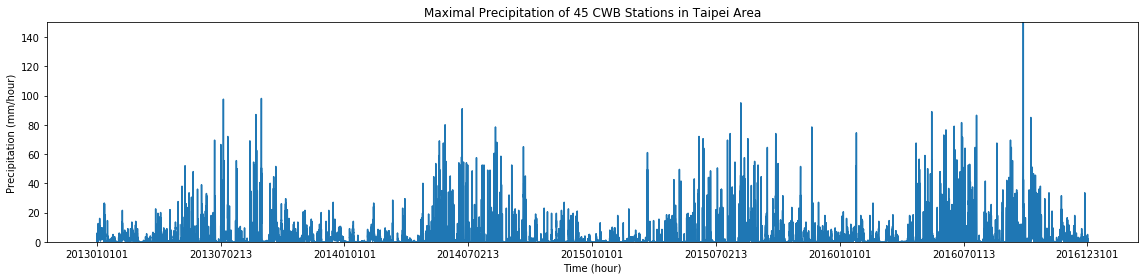

In [17]:
# Read data
tmp = pd.read_csv('./data/t1hr.csv')
#print(tmp.head())
# Move date to index
dates = tmp['date']
t1hr = tmp.iloc[:,1:]
print(t1hr.shape)
# Max of stations
t1hr_max = t1hr.max(axis=1)

# Making plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(t1hr_max)
plt.xticks(np.arange(0, len(t1hr_max), 4380), list(dates[np.arange(0, len(t1hr_max), 4380)]))
plt.ylim(0,150)
plt.xlabel('Time (hour)')
plt.ylabel('Precipitation (mm/hour)')
plt.title('Maximal Precipitation of 45 CWB Stations in Taipei Area')
plt.tight_layout()
plt.show()

In [21]:
# Test: precipitation > 80 mm/hr
p80 = (t1hr_max>=80)
print(dates[p80])

4478     2013070615
4479     2013070616
5630     2013082315
5821     2013083114
5822     2013083115
5823     2013083116
12321    2014052910
12928    2014062317
22781    2015080806
22782    2015080807
29534    2016051515
30590    2016062815
31119    2016072016
32773    2016092714
33040    2016100817
Name: date, dtype: int64


In [25]:
# Create date list
p01 = dates[t1hr_max>=1.]
p05 = dates[t1hr_max>=5.]
p10 = dates[t1hr_max>=10.]
p20 = dates[t1hr_max>=20.]
p40 = dates[t1hr_max>=40.]

# Show some basic statistics
print(len(dates))
print(len(p01))
print(len(p05))
print(len(p10))
print(len(p20))
print(len(p40))

35064
11481
4548
2194
878
239


In [29]:
# Output the lists
p01.to_csv('data/dates_p01.csv', header=True, index=False)
p05.to_csv('data/dates_p05.csv', header=True, index=False)
p10.to_csv('data/dates_p10.csv', header=True, index=False)
p20.to_csv('data/dates_p20.csv', header=True, index=False)
p40.to_csv('data/dates_p40.csv', header=True, index=False)

### List by Typhoon events

We use the typhoon warning records provided by CWB to create the list.

In [50]:
# Read in Typhoon warning data
tyw = pd.read_excel('data/2013-2016_TYW.xlsx')

# Align the Typhoon warning time stamp with the precipitation
t1=[]
t2=[]

# Loop through each typhoon
for i in range(tyw.shape[0]):
    ty = tyw.iloc[i,:]
    # Create time-stamp strings in YYYYMMDDHH
    d1 = ty['start_date'].strftime('%Y%m%d')+'01'
    d2 = ty['end_date'].strftime('%Y%m%d')+'24'
    # Find the index of the date range
    t1.append(list(dates).index(int(d1)))
    t2.append(list(dates).index(int(d2)))

tyw['start_idx'] = t1
tyw['end_idx'] = t2

tyw

,start_date,end_date,name_zhtw,name,start_idx,end_idx
0,2013-07-11,2013-07-13,蘇力,SOULIK,4584,4655
1,2013-07-17,2013-07-18,西馬隆,CIMARON,4728,4775
2,2013-08-20,2013-08-22,潭美,TRAMI,5544,5615
3,2013-08-27,2013-08-29,康芮,KONG-REY,5712,5783
4,2013-09-19,2013-09-22,天兔,USAGI,6264,6359
5,2013-10-04,2013-10-07,菲特,FITOW,6624,6719
6,2014-06-14,2014-06-15,哈吉貝,HAGIBIS,12696,12743
7,2014-07-21,2014-07-23,麥德姆,MATMO,13584,13655
8,2014-09-19,2014-09-22,鳳凰,FUNG-WONG,15024,15119
9,2015-05-10,2015-05-11,紅霞,NOUL,20616,20663


In [57]:
tydates = []

for i in range(tyw.shape[0]):
    ty = tyw.iloc[i,:]
    print(ty['start_idx'], ty['end_idx'])
    for j in np.arange(ty['start_idx'],ty['end_idx']+1):
        tydates.append({'timestamp':dates[j], 'typhoon':ty['name']})
    #tydates = tydates + list(np.arange(ty['start_idx'],ty['end_idx']+1))

tydates = pd.DataFrame(tydates)
print(tydates.head())

4584 4655
4728 4775
5544 5615
5712 5783
6264 6359
6624 6719
12696 12743
13584 13655
15024 15119
20616 20663
22056 22127
21984 22079
22728 22823
23064 23159
23976 24047
30768 30863
32400 32495
32472 32567
32712 32807
32952 32999
    timestamp typhoon
0  2013071101  SOULIK
1  2013071102  SOULIK
2  2013071103  SOULIK
3  2013071104  SOULIK
4  2013071105  SOULIK


In [58]:
tydates.to_csv('data/dates_typhoon.csv', header=True, index=False)